In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
import numpy as np


In [ ]:
df=pd.read_csv("/content/ipl (1).csv", parse_dates=["date"],index_col="date")
df

<ipython-input-3-d23958c7c192>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv("/content/ipl (1).csv", parse_dates=["date"],index_col="date")


,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
date,,,,,,,,,,,,,,
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-04,142,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Rajasthan Royals,M Vijay,S Narwal,19.0,0.0,1.5,19.0,0.0,16.0,3.0,246.0
2010-03-04,142,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Rajasthan Royals,M Vijay,S Narwal,23.0,0.0,1.6,23.0,0.0,20.0,3.0,246.0
2010-03-04,142,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Rajasthan Royals,ML Hayden,YK Pathan,23.0,0.0,2.1,23.0,0.0,20.0,3.0,246.0


In [ ]:
df1=df.head()
df1

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
date,,,,,,,,,,,,,,
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
2008-04-18,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


In [ ]:
df.isnull().sum()

mid               0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            1
runs              1
wickets           1
overs             1
runs_last_5       1
wickets_last_5    1
striker           1
non-striker       1
total             1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8592 entries, 2008-04-18 to 2009-04-28
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             8592 non-null   int64  
 1   venue           8592 non-null   object 
 2   bat_team        8592 non-null   object 
 3   bowl_team       8592 non-null   object 
 4   batsman         8591 non-null   object 
 5   bowler          8591 non-null   object 
 6   runs            8591 non-null   float64
 7   wickets         8591 non-null   float64
 8   overs           8591 non-null   float64
 9   runs_last_5     8591 non-null   float64
 10  wickets_last_5  8591 non-null   float64
 11  striker         8591 non-null   float64
 12  non-striker     8591 non-null   float64
 13  total           8591 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1006.9+ KB


In [ ]:
df=df.drop_duplicates()

In [ ]:
corr=df.corr()
corr

<ipython-input-8-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,-0.010411,-0.090608,0.002588,-0.032337,-0.056529,-0.049592,0.072418,-0.101900
runs,-0.010411,1.000000,0.593692,0.932635,0.746644,0.308540,0.606636,0.276540,0.291810
wickets,-0.090608,0.593692,1.000000,0.774955,0.253940,0.698859,0.012642,-0.196876,-0.327786
overs,0.002588,0.932635,0.774955,1.000000,0.617665,0.414583,0.453860,0.184026,0.036402
runs_last_5,-0.032337,0.746644,0.253940,0.617665,1.000000,0.073298,0.682296,0.469495,0.402995
wickets_last_5,-0.056529,0.308540,0.698859,0.414583,0.073298,1.000000,-0.221727,-0.424209,-0.286352
striker,-0.049592,0.606636,0.012642,0.453860,0.682296,-0.221727,1.000000,0.509154,0.454177
non-striker,0.072418,0.276540,-0.196876,0.184026,0.469495,-0.424209,0.509154,1.000000,0.286144
total,-0.101900,0.291810,-0.327786,0.036402,0.402995,-0.286352,0.454177,0.286144,1.000000


<ipython-input-10-dd73e8ae7eaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


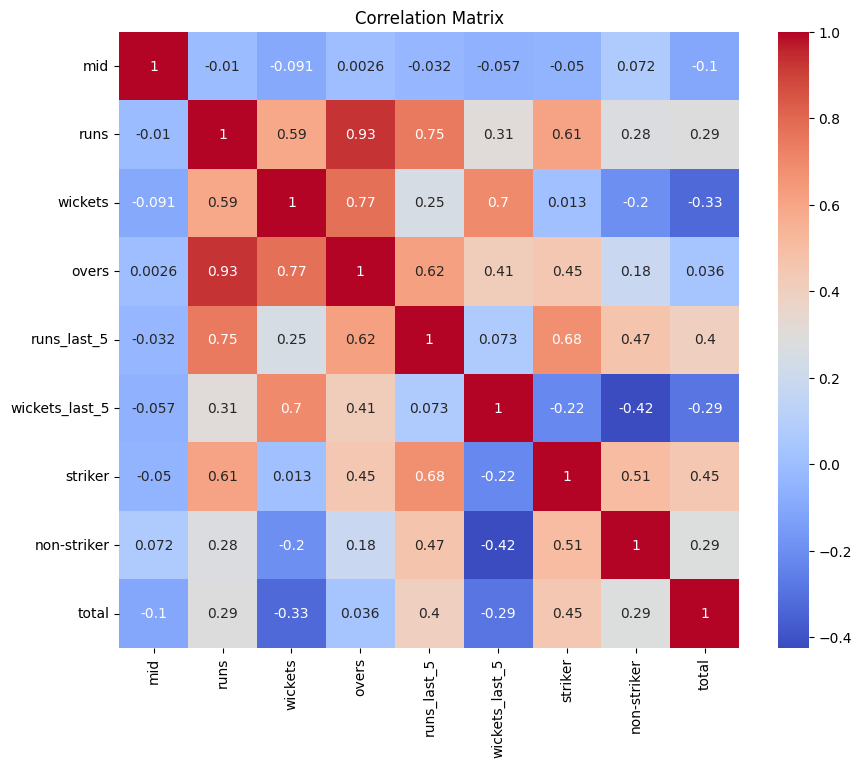

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

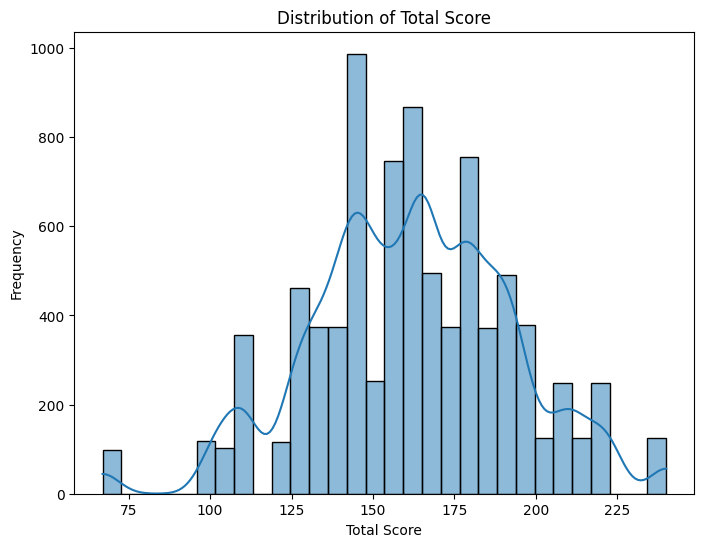

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total'], bins=30, kde=True)
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Score')
plt.show()

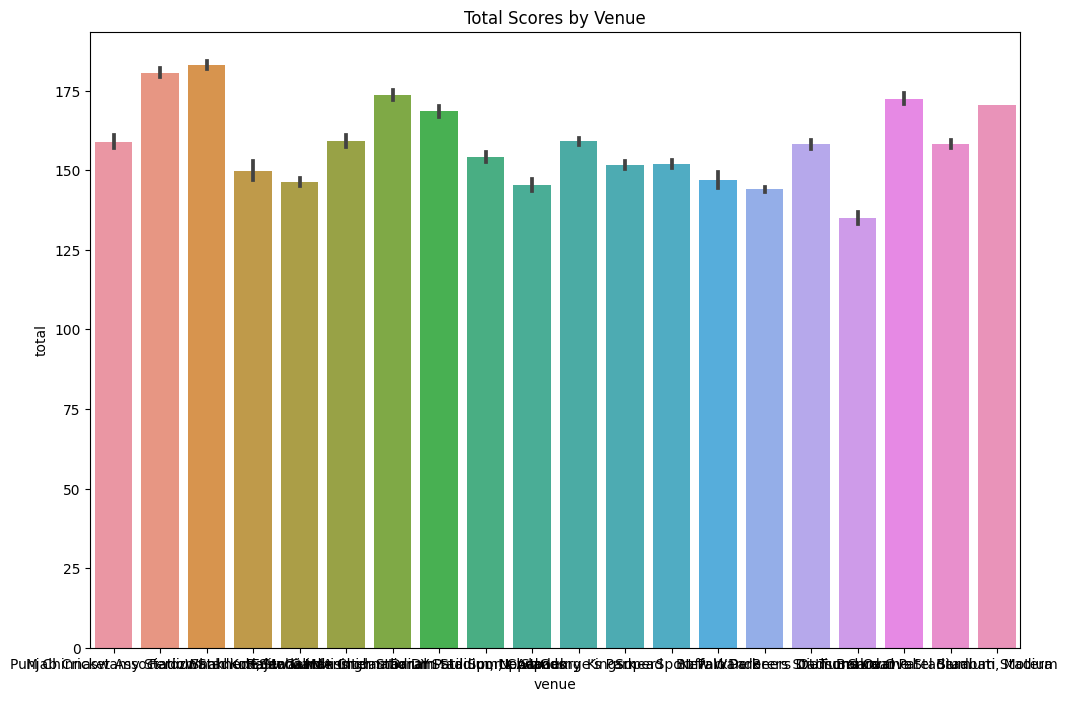

In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(x='venue', y='total', data=df)
plt.title('Total Scores by Venue')
plt.show()


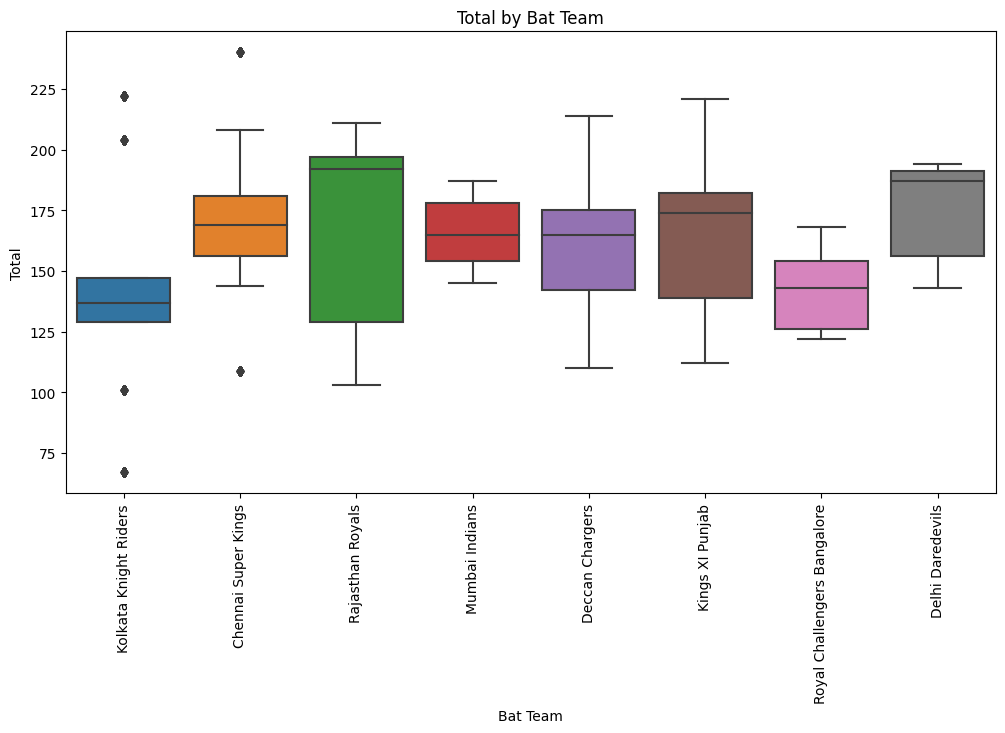

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bat_team', y='total', data=df)
plt.xlabel('Bat Team')
plt.ylabel('Total')
plt.title('Total by Bat Team')
plt.xticks(rotation=90)
plt.show()

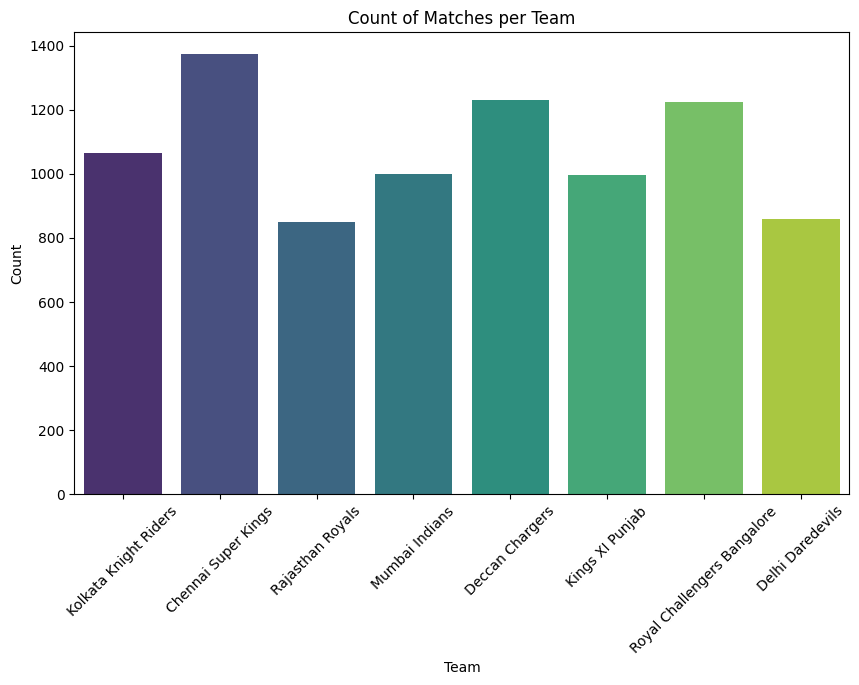

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bat_team', data=df, palette='viridis')
plt.title('Count of Matches per Team')
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
  df[i]=encoder.fit_transform(df[i])

In [ ]:
x=df.drop("total",axis=1)
y=df["total"]
scaler= StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred_lr)
r2=r2_score(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
print("mse:",mse)
print("r2:",r2)
print("mae:",mae)

mse: 203.24081531356987
r2: 0.5589977953167061
mae: 10.979895057217288


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
y_pred_dt=decision_tree.predict(x_test)
MSE=mean_squared_error(y_test,y_pred_dt)
r2_=r2_score(y_test,y_pred_dt)
MAE=mean_absolute_error(y_test,y_pred_dt)


print("mse:",MSE)
print("r2_score:",r2_)
print("mae:",MAE)

mse: 7.941361556064074
r2_score: 0.9827684318771891
mae: 0.3555491990846682


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred_rf=random_forest.predict(x_test)
mean_sq_error=mean_squared_error(y_test,y_pred_rf)
r2score=r2_score(y_test,y_pred_rf)
mean_abs_error=mean_absolute_error(y_test,y_pred_rf)

print("mse:",mean_sq_error)
print("r2:",r2score)
print("mae:",mean_abs_error)

mse: 1.860582522883295
r2: 0.9959628138997534
mae: 0.5472511441647597


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

y_pred_xg=xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xg)
r2_xgb=r2_score(y_test,y_pred_xg)
mae_xgb=mean_absolute_error(y_test,y_pred_xg)
print("mse:",mse_xgb)
print("r2:",r2_xgb)
print("mae:",mae_xgb)

mse: 5.357090543861375
r2: 0.9883759138788833
mae: 1.6201457630531773


In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.1,
                                   depth=6,
                                   verbose=100)

catboost_model.fit(x_train, y_train)

y_pred_cb = catboost_model.predict(x_test)

mse_cb = mean_squared_error(y_test,y_pred_cb )
r2_cb=r2_score(y_test,y_pred_cb)
mae_cb=mean_absolute_error(y_test,y_pred_cb)
print("mse:",mse_cb)
print("r2:",r2_cb)
print("mae:",mae_cb)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00
0:	learn: 20.4807330	total: 51.7ms	remaining: 51.7s
100:	learn: 7.3011555	total: 407ms	remaining: 3.62s
200:	learn: 4.2451371	total: 773ms	remaining: 3.07s
300:	learn: 2.9071472	total: 1.13s	remaining: 2.63s
400:	learn: 2.2034238	total: 1.54s	remaining: 2.31s
500:	learn: 1.8066466	total: 2s	remaining: 1.99s
600:	learn: 1.5546104	total: 2.4s	remaining: 1.59s
700:	learn: 1.3681071	total: 2.79s	remaining: 1.19s
800:	learn: 1.2294204	total: 3.17s	remaining: 788ms
900:	learn: 1.1317790	total: 3.54s	remaining: 389ms
999:	learn: 1.0511710	total: 3.92s	remaining: 0us
mse: 1.7422648825782254
r2: 0.9962195455023449
mae: 0.9980275048624508


In [ ]:
from sklearn.svm import SVR
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

svr = SVR(kernel='linear', C=100)

svr.fit(x_train, y_train)

y_pred_svr = svr.predict(x_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr=r2_score(y_test,y_pred_svr)
mae_svr=mean_absolute_error(y_test,y_pred_svr)
print("mse:",mse_svr)
print("r2:",r2_svr)
print("mae:",mae_svr)

mse: 204.2418553863894
r2: 0.5568256879158938
mae: 10.964338047490083


In [ ]:
scores=['MSE','MAE','R2 SCORE']
name=['linear regression','decision tree','random forest','xg_boost','cat_boost',"svm"]
pred=[y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xg,y_pred_cb,y_pred_svr]
mse=[]
mae=[]
r2=[]
for j in pred:
  mse.append(mean_squared_error(y_test,j))
  mae.append(mean_absolute_error(y_test,j))
  r2.append(r2_score(y_test,j))
eval_scores=pd.DataFrame(
    {'Models':name,
     'MSE':mse,
     'MAE':mae,
     'R2':r2}
)
eval_scores

,Models,MSE,MAE,R2
0,linear regression,203.240815,10.979895,0.558998
1,decision tree,7.941362,0.355549,0.982768
2,random forest,1.860583,0.547251,0.995963
3,xg_boost,5.357091,1.620146,0.988376
4,cat_boost,1.742265,0.998028,0.996220
5,svm,204.241855,10.964338,0.556826
